In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import feature_selection as fs
from sklearn import tree
from sklearn import ensemble as es
from sklearn import decomposition as dc
from sklearn import preprocessing as pp
import warnings

warnings.filterwarnings("ignore");

#### Load Data

In [2]:
df = pd.read_csv("archive/art_coverage_by_country_clean.csv")
df = df.dropna()

# df.head()
df = df.drop(['Estimated number of people living with HIV_min',
       'Estimated number of people living with HIV_median',
       'Estimated number of people living with HIV_max', "Reported number of people receiving ART", "Estimated number of people living with HIV"], axis = 1);

df = df.reset_index();
df = df.drop(["index"], axis = 1);

for i in range(len(df["Estimated ART coverage among people living with HIV (%)"])): 
       pos = df["Estimated ART coverage among people living with HIV (%)"][i].find("[");
       df["Estimated ART coverage among people living with HIV (%)"][i] = df["Estimated ART coverage among people living with HIV (%)"][i][:pos];

for i in range(len(df["WHO Region"])): 
    if df["WHO Region"][i] != "Africa" and df["WHO Region"][i] != "Europe":
        df["WHO Region"][i] = "Other"

df.head()

df.head()

,Country,Estimated ART coverage among people living with HIV (%),Estimated ART coverage among people living with HIV (%)_median,Estimated ART coverage among people living with HIV (%)_min,Estimated ART coverage among people living with HIV (%)_max,WHO Region
0,Afghanistan,13,13.0,7.0,20.0,Other
1,Algeria,81,81.0,75.0,86.0,Africa
2,Angola,27,27.0,23.0,31.0,Africa
3,Argentina,61,61.0,55.0,67.0,Other
4,Armenia,53,53.0,44.0,65.0,Europe


#### Process Data

In [3]:
# label: list[str] = ['Eastern Mediterranean', 'Africa', 'Americas', 'Europe', 'Western Pacific', 'South-East Asia'];
label: list[str] = ['Africa', 'Europe', 'Other'];
cnt: list[int] = [i for i in range(len(label))];

mp = {};
for i in range(len(label)):
    mp[label[i]] = cnt[i];

df['WHO Region'] = df['WHO Region'].map(mp);

In [4]:
mp_country = {};
for i in df["Country"]: 
    if (i not in mp_country): mp_country[i] = 1;
    else: mp_country[i] += 1;


tmp = {};
for a, b in mp_country.items():
    tmp[a] = 1;

for i in range(len(df["Country"])):
    s: str = df["Country"][i];
    df['Country'][i] = float(df["WHO Region"][i] + tmp[s] * 0.01);
    tmp[s] += 1;

df.head()

,Country,Estimated ART coverage among people living with HIV (%),Estimated ART coverage among people living with HIV (%)_median,Estimated ART coverage among people living with HIV (%)_min,Estimated ART coverage among people living with HIV (%)_max,WHO Region
0,2.01,13,13.0,7.0,20.0,2
1,0.01,81,81.0,75.0,86.0,0
2,0.01,27,27.0,23.0,31.0,0
3,2.01,61,61.0,55.0,67.0,2
4,1.01,53,53.0,44.0,65.0,1


In [5]:
df = df.drop(["Country"], axis = 1);
target: list[str] = df['WHO Region'];
df = df.drop(['WHO Region'], axis = 1);
df.head()

,Estimated ART coverage among people living with HIV (%),Estimated ART coverage among people living with HIV (%)_median,Estimated ART coverage among people living with HIV (%)_min,Estimated ART coverage among people living with HIV (%)_max
0,13,13.0,7.0,20.0
1,81,81.0,75.0,86.0
2,27,27.0,23.0,31.0
3,61,61.0,55.0,67.0
4,53,53.0,44.0,65.0


In [6]:
# df = pp.scale(df);

#### Select K Best

In [6]:
skb = fs.SelectKBest(fs.f_classif, k=3);

skb.fit_transform(df, target);

In [7]:
tc = tree.DecisionTreeClassifier();
tc.fit(df, target);
tc.feature_importances_

array([0.19381544, 0.18456584, 0.30061174, 0.32100698])

#### Random Forest Classifier

In [8]:
rfc = es.RandomForestClassifier(n_estimators=100, random_state=37);

rr = rfc.fit(df, target);
rfc.feature_importances_

array([0.22127185, 0.21820647, 0.2975717 , 0.26294998])

In [9]:
srm = fs.SelectFromModel(rfc, prefit=True, threshold=0.03);
srm.transform(df)

array([['13', 13.0, 7.0, 20.0],
       ['81', 81.0, 75.0, 86.0],
       ['27', 27.0, 23.0, 31.0],
       ['61', 61.0, 55.0, 67.0],
       ['53', 53.0, 44.0, 65.0],
       ['83', 83.0, 70.0, 93.0],
       ['52', 52.0, 45.0, 58.0],
       ['22', 22.0, 19.0, 25.0],
       ['50', 50.0, 44.0, 57.0],
       ['59', 59.0, 48.0, 75.0],
       ['28', 28.0, 26.0, 31.0],
       ['61', 61.0, 40.0, 95.0],
       ['37', 37.0, 20.0, 78.0],
       ['44', 44.0, 40.0, 48.0],
       ['67', 67.0, 57.0, 78.0],
       ['83', 83.0, 75.0, 90.0],
       ['66', 66.0, 51.0, 82.0],
       ['41', 41.0, 35.0, 48.0],
       ['62', 62.0, 50.0, 75.0],
       ['80', 80.0, 69.0, 94.0],
       ['89', 89.0, 75.0, 95.0],
       ['81', 81.0, 71.0, 93.0],
       ['52', 52.0, 46.0, 57.0],
       ['36', 36.0, 30.0, 45.0],
       ['51', 51.0, 40.0, 63.0],
       ['63', 63.0, 56.0, 70.0],
       ['73', 73.0, 60.0, 86.0],
       ['79', 79.0, 39.0, 95.0],
       ['35', 35.0, 27.0, 46.0],
       ['49', 49.0, 44.0, 54.0],
       ['55

#### PCA

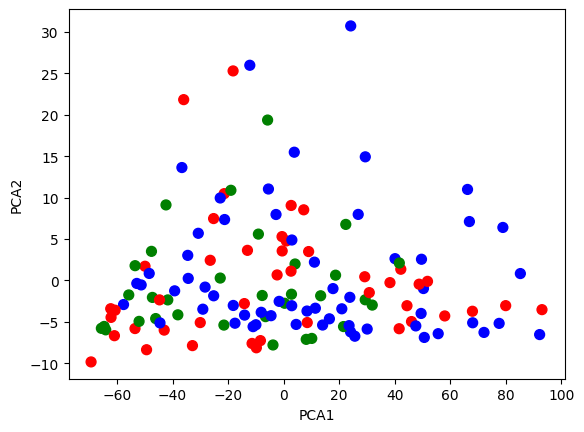

In [10]:
pca = dc.PCA(n_components=2);
# pca.fit(df, target);
# print(pca.explained_variance_ratio_)

# scree_plot = pd.Series(pca.explained_variance_ratio_).plot.bar(rot = 1);

# df = df.drop(["Estimated number of people living with HIV_median", "Estimated number of people living with HIV_max", "Estimated number of people living with HIV_min"], axis=1);
# df = df.drop(["Reported number of people receiving ART"], axis = 1);
pcs = pca.fit_transform(df, target);
pcs_df = pd.DataFrame(pcs, columns=['PCA1', 'PCA2']);
pcs_df.head()

color: list[str] = [];

for i in target: 
    if (i == 0): color.append('r');
    elif (i == 1): color.append('g');
    elif (i == 2): color.append('b');
    elif (i == 3): color.append('y');
    elif (i == 4): color.append('m');
    else: color.append('c');

pcs_df.plot.scatter('PCA1', 'PCA2', c = color, s = 50);

#### Many Model...

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [13]:
sc = StandardScaler();
df = sc.fit_transform(df);

x_train, x_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=37);

In [14]:
forest = RandomForestClassifier(n_estimators=100, random_state=37);
forest.fit(x_train, y_train);

pred = forest.predict(x_test);
print(f"Random Forest_train: {forest.score(x_train, y_train)}")
print(f"Random Forest_test: {forest.score(x_test, y_test)}")

print(pred);
# print(y_test);

Random Forest_train: 1.0
Random Forest_test: 0.17857142857142858
[5 1 3 5 0 3 1 3 1 1 3 3 0 3 1 3 3 1 3 1 1 3 3 2 3 5 1 1]


In [15]:
linear_svm = LinearSVC(random_state=0)
linear_svm.fit(x_train, y_train)
predictions = linear_svm.predict(x_test)
print(f"Linear SVM_train: {linear_svm.score(x_train, y_train)}")
print(f"Linear SVM_test: {linear_svm.score(x_test, y_test)}")

Linear SVM_train: 0.37962962962962965
Linear SVM_test: 0.14285714285714285


In [16]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
predictions = knn.predict(x_test)
print(f"KNN_train: {knn.score(x_train, y_train)}")
print(f"KNN_test: {knn.score(x_test, y_test)}")

KNN_train: 0.5092592592592593
KNN_test: 0.25


In [17]:
tree = DecisionTreeClassifier(random_state=0, min_samples_split=5)
tree.fit(x_train, y_train)
predictions = tree.predict(x_test)
print(f"Decision tree_train: {tree.score(x_train, y_train)}")
print(f"Decision tree_test: {tree.score(x_test, y_test)}")

Decision tree_train: 0.7685185185185185
Decision tree_test: 0.25


#### Hamming Distance HW

In [3]:
df = pd.read_csv("hw5.csv");

cmp = df.values[0];

df

,性別,部門,薪資,配偶
0,男,市場部,24000,無
1,女,研發部,45000,有
2,女,會計部,25000,有
3,男,研發部,40000,無
4,女,會計部,24000,有
5,男,研發部,40000,無
6,男,市場部,24000,有


In [4]:
def Hamming_list (df: pd.DataFrame) -> list[list]:
    n: int = len(df.values);
    res: list[list] = [[0 for i in range(n)] for j in range(n)];
    for i in range(n):
        nw = df.values[i];
        for j in range(i):
            tmp = df.values[j];
            for k in range(len(nw)): 
                if (tmp[k] == nw[k]): 
                    res[j][i] += 1;
            res[j][i] /= len(nw);
        
    return res;

In [5]:
num = Hamming_list(df);

In [6]:
def show (arr: list[list]) -> None:
    for i in range(len(arr)):
        for j in range(len(arr[i])):
            print(f"{arr[i][j]:.2f}", end = ' ');
        print();

In [7]:
show(num)

0.00 0.00 0.00 0.50 0.25 0.50 0.75 
0.00 0.00 0.50 0.25 0.50 0.25 0.25 
0.00 0.00 0.00 0.00 0.75 0.00 0.25 
0.00 0.00 0.00 0.00 0.00 1.00 0.25 
0.00 0.00 0.00 0.00 0.00 0.00 0.50 
0.00 0.00 0.00 0.00 0.00 0.00 0.25 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 


> 各別移除資料

In [8]:
df2 = df.drop(["性別"], axis = 1);
df3 = df.drop(["部門"], axis = 1);
df4 = df.drop(["薪資"], axis = 1);
df5 = df.drop(["配偶"], axis = 1);

> 移除後計算 `Hamming Distance`

In [9]:
num2 = Hamming_list(df2);
num3 = Hamming_list(df3);
num4 = Hamming_list(df4);
num5 = Hamming_list(df5);

print("移除性別: ");
show(num2);

print("\n移除部門: ")
show(num3);

print("\n移除薪資: ")
show(num4);

print("\n移除配偶: ")
show(num5);

移除性別: 
0.00 0.00 0.00 0.33 0.33 0.33 0.67 
0.00 0.00 0.33 0.33 0.33 0.33 0.33 
0.00 0.00 0.00 0.00 0.67 0.00 0.33 
0.00 0.00 0.00 0.00 0.00 1.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.67 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 

移除部門: 
0.00 0.00 0.00 0.67 0.33 0.67 0.67 
0.00 0.00 0.67 0.00 0.67 0.00 0.33 
0.00 0.00 0.00 0.00 0.67 0.00 0.33 
0.00 0.00 0.00 0.00 0.00 1.00 0.33 
0.00 0.00 0.00 0.00 0.00 0.00 0.67 
0.00 0.00 0.00 0.00 0.00 0.00 0.33 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 

移除薪資: 
0.00 0.00 0.00 0.67 0.00 0.67 0.67 
0.00 0.00 0.67 0.33 0.67 0.33 0.33 
0.00 0.00 0.00 0.00 1.00 0.00 0.33 
0.00 0.00 0.00 0.00 0.00 1.00 0.33 
0.00 0.00 0.00 0.00 0.00 0.00 0.33 
0.00 0.00 0.00 0.00 0.00 0.00 0.33 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 

移除配偶: 
0.00 0.00 0.00 0.33 0.33 0.33 1.00 
0.00 0.00 0.33 0.33 0.33 0.33 0.00 
0.00 0.00 0.00 0.00 0.67 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 1.00 0.33 
0.00 0.00 0.00 0.00 0.00 0.00 0.33 
0.00 0.00 0.00 0.00 0.00 0.00 0.3

> 計算亂度 $E = \sum ((p * \log{p}) + ((1 - p) * \log{(1 - p)}))$

In [10]:
import math

def entropy (p: float) -> float:
    if (p == 0 or p == 1): return 0;
    return -p * math.log2(p) - (1 - p) * math.log2(1 - p);

def cal_entropy (num: list[list]) -> float:
    res: float = 0;
    for i in range(len(num)):
        for j in range(len(num[i])):
            res += entropy(num[i][j]);
    return res;

In [11]:
Original: float = cal_entropy(num);
print(f"原始資料: {Original:.5f}");

rm_gen: float = cal_entropy(num2);
print(f"移除性別: {rm_gen:.5f}");

rm_dep: float = cal_entropy(num3);
print(f"移除部門: {rm_dep:.5f}");

rm_sal: float = cal_entropy(num4);
print(f"移除薪資: {rm_sal:.5f}");

rm_spo: float = cal_entropy(num5);
print(f"移除配偶: {rm_spo:.5f}");

原始資料: 12.30150
移除性別: 11.01955
移除部門: 11.01955
移除薪資: 11.01955
移除配偶: 10.10125


> 亂度大到小排列

In [12]:
class Data:
    def __init__(self, name: str, num: float):
        self.name: str = name;
        self.num: int = num;


data: list[Data] = [Data("原始資料", Original), Data("移除性別", rm_gen), Data("移除部門", rm_dep), Data("移除薪資", rm_sal), Data("移除配偶", rm_spo)];

data.sort(key = lambda x: x.num, reverse = True);

print("亂度大到小排列: ");
for i in data:
    print(f"{i.name: >7}: {i.num:.5f}");

亂度大到小排列: 
   原始資料: 12.30150
   移除性別: 11.01955
   移除部門: 11.01955
   移除薪資: 11.01955
   移除配偶: 10.10125
